In [5]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set()

In [2]:
def make_regression(func, n_elements, noise=0.0, random_state=None):
    rng = np.random.RandomState(random_state)
    x = rng.uniform(5.0, size=n_elements)
    n = rng.normal(scale=noise, size=n_elements)
    y = func(x) + n
    return x.reshape(-1, 1), y

def plot_regression_line(clf, xb, yb, n=100):
    xx = np.linspace(*xb, n).reshape(-1, 1)
    yy = clf.predict(xx)
    plt.plot(xx, yy, color='red', linewidth=20, alpha=0.3)

In [3]:
X, y = make_regression(lambda x: x**2 + 2*x, 1000, random_state=0, noise=5.0)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.2)
train_X, dev_X, train_y, dev_y = train_test_split(train_X, train_y, random_state=0, test_size=0.15)

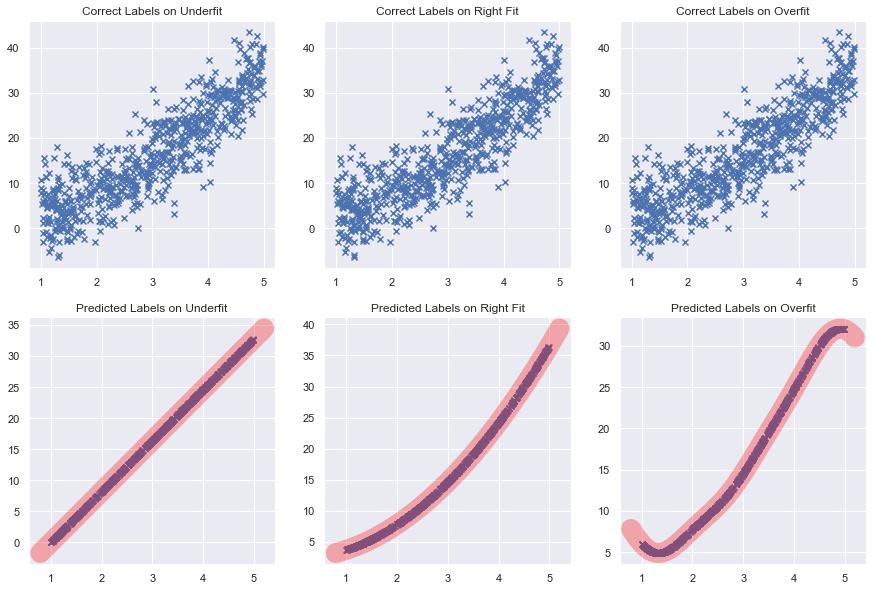

In [4]:
names = ['Underfit', 'Right Fit', 'Overfit']
clfs = [
    SVR(kernel='linear'),
    SVR(kernel='poly', degree=2, gamma='auto'),
    SVR(kernel='rbf', gamma='auto')
]

plt.figure(figsize=(15, 10))
for idx, (clf, name) in enumerate(zip(clfs, names), 1):
    clf.fit(train_X, train_y)
    pred = clf.predict(train_X)
    plt.subplot(2, 3, idx)
    plt.title(f'Correct Labels on {name}')
    plt.scatter(train_X.ravel(), train_y, marker='x')
    plt.subplot(2, 3, idx+3)
    plt.title(f'Predicted Labels on {name}')
    plt.scatter(train_X.ravel(), pred, marker='x')
    plot_regression_line(clf, plt.xlim(), plt.ylim())
plt.show()

In [8]:
print('Error on Development Set')
for idx, clf in enumerate(clfs, 1):
    pred = clf.predict(dev_X)
    error = mean_squared_error(dev_y, pred)
    print(f'Error for model#{idx}: {error}')

Error on Development Set
Error for model#1: 24.846141698615664
Error for model#2: 20.94387956189149
Error for model#3: 23.040445846002807


In [10]:
print('Error on Test Set')
for idx, clf in enumerate(clfs, 1):
    pred = clf.predict(test_X)
    error = mean_squared_error(test_y, pred)
    print(f'Error for model#{idx}: {error}')

Error on Test Set
Error for model#1: 26.236208296241724
Error for model#2: 23.579498842487368
Error for model#3: 24.83229980628731
